# Task1 — Movie Genre Classification (TF‑IDF + NB / LR / LinearSVC)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [4]:
mov = pd.read_csv(r"C:\Users\HP\Downloads\Task1\Genre Classification Dataset\train_data.txt",sep=" ::: ",engine="python",
                  names=["ID", "Title_Year", "Genre", "Plot"], encoding="utf-8")
mov.head()


,ID,Title_Year,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
print("Shape:", mov.shape)
print("\nInfo:")
print(mov.info())

print("\nMissing values per column:")
print(mov.isnull().sum())

mov['Genre'].value_counts().head(20)


Shape: (54214, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          54214 non-null  int64 
 1   Title_Year  54214 non-null  object
 2   Genre       54214 non-null  object
 3   Plot        54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None

Missing values per column:
ID            0
Title_Year    0
Genre         0
Plot          0
dtype: int64


Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
Name: count, dtype: int64

In [6]:
before = mov.shape[0]
mov = mov.dropna(subset=["Genre", "Plot"])
mov = mov[mov['Plot'].str.strip() != ""]
after = mov.shape[0]
print(f"Rows kept: {after}/{before}")

mov = mov.reset_index(drop=True)
mov.head()


Rows kept: 54214/54214


,ID,Title_Year,Genre,Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [7]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

mov['clean_plot'] = mov['Plot'].apply(clean_text)
mov[['Genre','clean_plot']].head()


,Genre,clean_plot
0,drama,listening in to a conversation between his doc...
1,thriller,a brother and sister with a past incestuous re...
2,adult,as the bus empties the students for their fiel...
3,drama,to help their unemployed father make ends meet...
4,drama,the film s title refers not only to the un rec...


## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mov['genre_encoded'] = le.fit_transform(mov['Genre'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'action': np.int64(0), 'adult': np.int64(1), 'adventure': np.int64(2), 'animation': np.int64(3), 'biography': np.int64(4), 'comedy': np.int64(5), 'crime': np.int64(6), 'documentary': np.int64(7), 'drama': np.int64(8), 'family': np.int64(9), 'fantasy': np.int64(10), 'game-show': np.int64(11), 'history': np.int64(12), 'horror': np.int64(13), 'music': np.int64(14), 'musical': np.int64(15), 'mystery': np.int64(16), 'news': np.int64(17), 'reality-tv': np.int64(18), 'romance': np.int64(19), 'sci-fi': np.int64(20), 'short': np.int64(21), 'sport': np.int64(22), 'talk-show': np.int64(23), 'thriller': np.int64(24), 'war': np.int64(25), 'western': np.int64(26)}


## 6. TF‑IDF Vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# You can lower max_features if your machine is slow (e.g., 2000)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(mov['clean_plot'])
y = mov['genre_encoded']

X.shape


(54214, 5000)

## 7. Train / Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape


((43371, 5000), (10843, 5000))

## 8. Model 1 — Multinomial Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred_nb, target_names=le.classes_))


MultinomialNB Accuracy: 0.5221802084294015
              precision    recall  f1-score   support

      action       0.56      0.07      0.12       263
       adult       0.60      0.05      0.09       118
   adventure       0.75      0.04      0.07       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.51      0.43      0.47      1490
       crime       0.00      0.00      0.00       101
 documentary       0.57      0.89      0.70      2619
       drama       0.46      0.82      0.59      2723
      family       0.00      0.00      0.00       157
     fantasy       0.00      0.00      0.00        65
   game-show       1.00      0.18      0.30        39
     history       0.00      0.00      0.00        49
      horror       0.72      0.37      0.48       441
       music       0.70      0.10      0.17       146
     musical       0.00      0.00      0.00        55
     mystery       0.00      0.00     

## 9. Model 2 — Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr, target_names=le.classes_))


Logistic Regression Accuracy: 0.579728857327308
              precision    recall  f1-score   support

      action       0.49      0.25      0.34       263
       adult       0.77      0.31      0.44       118
   adventure       0.56      0.12      0.19       155
   animation       0.73      0.08      0.14       100
   biography       0.00      0.00      0.00        53
      comedy       0.52      0.60      0.56      1490
       crime       0.29      0.02      0.04       101
 documentary       0.66      0.85      0.75      2619
       drama       0.54      0.77      0.64      2723
      family       0.56      0.11      0.19       157
     fantasy       0.00      0.00      0.00        65
   game-show       1.00      0.38      0.56        39
     history       0.00      0.00      0.00        49
      horror       0.66      0.55      0.60       441
       music       0.67      0.38      0.49       146
     musical       1.00      0.02      0.04        55
     mystery       0.50      0.02

## 10. Model 3 — Linear SVM (LinearSVC)

In [13]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

print("LinearSVC Accuracy:", accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm, target_names=le.classes_))


LinearSVC Accuracy: 0.5670017522825787
              precision    recall  f1-score   support

      action       0.42      0.37      0.39       263
       adult       0.65      0.40      0.49       118
   adventure       0.40      0.23      0.30       155
   animation       0.31      0.18      0.23       100
   biography       0.00      0.00      0.00        53
      comedy       0.52      0.57      0.54      1490
       crime       0.22      0.07      0.11       101
 documentary       0.69      0.81      0.74      2619
       drama       0.57      0.70      0.62      2723
      family       0.36      0.18      0.24       157
     fantasy       0.05      0.02      0.02        65
   game-show       0.79      0.56      0.66        39
     history       0.60      0.06      0.11        49
      horror       0.60      0.62      0.61       441
       music       0.54      0.43      0.48       146
     musical       0.33      0.07      0.12        55
     mystery       0.16      0.05      0.0

## 11. Confusion Matrix

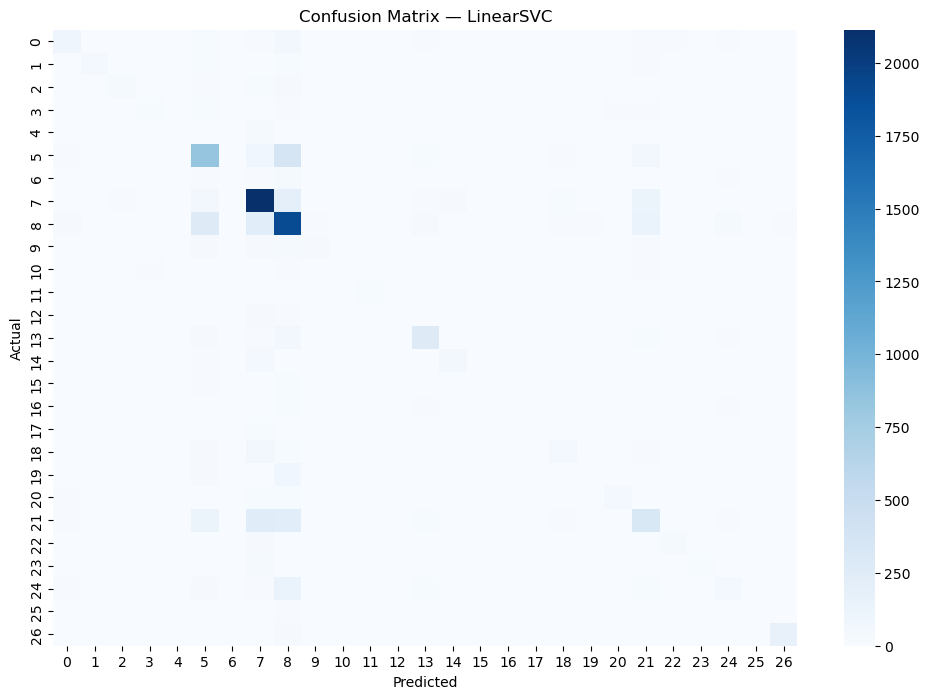

In [14]:
cm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix — LinearSVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
